In [3]:
# Get latitude and longitude for two stations
import requests
import json

def get_stop_location(stop_id):
    url = f"https://data.etabus.gov.hk/v1/transport/kmb/stop/{stop_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if request was successful
        data = response.json()
        
        if data.get("data"):
            stop_info = data["data"]
            return {
                "stop_id": stop_info["stop"],
                "name_en": stop_info["name_en"],
                "name_tc": stop_info["name_tc"],
                "latitude": stop_info["lat"],
                "longitude": stop_info["long"]
            }
        else:
            return {"error": f"No data found for stop_id {stop_id}"}
    except requests.exceptions.RequestException as e:
        return {"error": f"Failed to fetch data: {e}"}

# Test stop_id
stop_ids = ["3F24CFF9046300D9", "33ABA49F0E91A247","07AB149DAD888683","4A0ECA0D5AA4CB7E","3A7AC3A5F9530786","023E9E5A9E073E1A","B34F59A0270AEDA4","437CE05BCFE6248C"]

for stop_id in stop_ids:
    result = get_stop_location(stop_id)
    if "error" in result:
        print(f"Stop ID {stop_id}: {result['error']}")
    else:
        print(f"Stop ID: {result['stop_id']}")
        print(f"Name (EN): {result['name_en']}")
        print(f"Name (TC): {result['name_tc']}")
        print(f"Latitude: {result['latitude']}")
        print(f"Longitude: {result['longitude']}")
        print(f"Google Maps URL: https://www.google.com/maps?q={result['latitude']},{result['longitude']}")
        print("-" * 50)


Stop ID: 3F24CFF9046300D9
Name (EN): St MARTIN (PA206)
Name (TC): 雲滙 (PA206)
Latitude: 22.429805
Longitude: 114.203323
Google Maps URL: https://www.google.com/maps?q=22.429805,114.203323
--------------------------------------------------
Stop ID: 33ABA49F0E91A247
Name (EN): St MARTIN (PA209)
Name (TC): 雲滙 (PA209)
Latitude: 22.429805
Longitude: 114.203323
Google Maps URL: https://www.google.com/maps?q=22.429805,114.203323
--------------------------------------------------
Stop ID: 07AB149DAD888683
Name (EN): St MARTIN (PA207)
Name (TC): 雲滙 (PA207)
Latitude: 22.429805
Longitude: 114.203323
Google Maps URL: https://www.google.com/maps?q=22.429805,114.203323
--------------------------------------------------
Stop ID: 4A0ECA0D5AA4CB7E
Name (EN): St MARTIN (PA208)
Name (TC): 雲滙 (PA208)
Latitude: 22.429805
Longitude: 114.203323
Google Maps URL: https://www.google.com/maps?q=22.429805,114.203323
--------------------------------------------------
Stop ID: 3A7AC3A5F9530786
Name (EN): CHONG SAN R

In [2]:
# First station divided by stopID
import requests
from datetime import datetime, timedelta

# Define the list of stop IDs for St. Martin
stop_ids = ["3F24CFF9046300D9", "33ABA49F0E91A247", "07AB149DAD888683", "4A0ECA0D5AA4CB7E"]

# Get current time (assuming UTC+08:00 for Hong Kong)
now = datetime.now().astimezone(tz=None)  # Local time with timezone
start_time = now + timedelta(minutes=5)  # Start 5 minutes from now
end_time = start_time + timedelta(hours=1) # End 1 hour later

# Initialize lists to store results
all_filtered_etas = []
all_etas_by_stop = {}  # To store all ETAs for fallback display, keyed by stop ID

# Fetch data for each stop ID
for stop_id in stop_ids:
    url = f"https://data.etabus.gov.hk/v1/transport/kmb/stop-eta/{stop_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()
        
        # Initialize list for this stop's ETAs
        all_etas_by_stop[stop_id] = []
        
        # Process ETA data
        if data.get("data"):
            for eta in data["data"]:
                if eta.get("eta"):  # Check if eta is not None
                    eta_time = datetime.strptime(eta["eta"], "%Y-%m-%dT%H:%M:%S%z")
                    all_etas_by_stop[stop_id].append(eta)  # Collect all ETAs for this stop
                    if start_time <= eta_time <= end_time:
                        all_filtered_etas.append({
                            "stop_id": stop_id,
                            "route": eta["route"],
                            "dest": eta.get("dest_tc", eta.get("dest_en", "Unknown")),
                            "eta": eta["eta"]
                        })
    except requests.RequestException as e:
        print(f"Error fetching data for Stop ID {stop_id}: {e}")

# Print results to console
print(f"Bus ETA for St. Martin Station")
print(f"Target Interval: {start_time.strftime('%H:%M')} to {end_time.strftime('%H:%M')} on {now.strftime('%Y-%m-%d')}")
print("=" * 60)

if all_filtered_etas:
    for entry in sorted(all_filtered_etas, key=lambda x: x["eta"]):  # Sort by ETA time
        print(f"Stop ID: {entry['stop_id']}")
        print(f"Route: {entry['route']}")
        print(f"Destination: {entry['dest']}")
        print(f"ETA: {entry['eta']}")
        print("-" * 60)
else:
    print("No bus arrivals found in the target interval for any stop.")
    print("-" * 60)
    print("All available ETAs (for reference):")
    for stop_id in stop_ids:
        if all_etas_by_stop.get(stop_id):
            print(f"\nStop ID: {stop_id}")
            for entry in all_etas_by_stop[stop_id]:
                if entry.get("eta"):
                    print(f"Route: {entry['route']}, ETA: {entry['eta']}")
        else:
            print(f"\nStop ID: {stop_id}: No ETA data returned by the API.")


Bus ETA for St. Martin Station
Target Interval: 00:16 to 01:16 on 2025-11-17
Stop ID: 07AB149DAD888683
Route: 96
Destination: 康盛花園
ETA: 2025-11-17T08:17:09+08:00
------------------------------------------------------------
Stop ID: 3F24CFF9046300D9
Route: 274
Destination: 烏溪沙站
ETA: 2025-11-17T08:19:15+08:00
------------------------------------------------------------
Stop ID: 33ABA49F0E91A247
Route: 272X
Destination: 旺角東站
ETA: 2025-11-17T08:19:22+08:00
------------------------------------------------------------
Stop ID: 33ABA49F0E91A247
Route: 73D
Destination: 荃灣(如心廣場)
ETA: 2025-11-17T08:19:48+08:00
------------------------------------------------------------
Stop ID: 07AB149DAD888683
Route: 271B
Destination: 佐敦(西九龍站)
ETA: 2025-11-17T08:20:37+08:00
------------------------------------------------------------
Stop ID: 3F24CFF9046300D9
Route: 272A
Destination: 白石角(循環線)
ETA: 2025-11-17T08:21:46+08:00
------------------------------------------------------------
Stop ID: 3F24CFF9046300D9
R

In [3]:
# Second station divided by stopID
import requests
from datetime import datetime, timedelta

# Define the list of stop IDs for CHONG SAN ROAD
stop_ids = ["3A7AC3A5F9530786","023E9E5A9E073E1A","B34F59A0270AEDA4","437CE05BCFE6248C"]

# Get current time (assuming UTC+08:00 for Hong Kong)
now = datetime.now().astimezone(tz=None)  # Local time with timezone
start_time = now + timedelta(minutes=5)  # Start 5 minutes from now
end_time = start_time + timedelta(hours=1)  # End 1 hour later

# Initialize lists to store results
all_filtered_etas = []
all_etas_by_stop = {}  # To store all ETAs for fallback display, keyed by stop ID

# Fetch data for each stop ID
for stop_id in stop_ids:
    url = f"https://data.etabus.gov.hk/v1/transport/kmb/stop-eta/{stop_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        data = response.json()
        
        # Initialize list for this stop's ETAs
        all_etas_by_stop[stop_id] = []
        
        # Process ETA data
        if data.get("data"):
            for eta in data["data"]:
                if eta.get("eta"):  # Check if eta is not None
                    eta_time = datetime.strptime(eta["eta"], "%Y-%m-%dT%H:%M:%S%z")
                    all_etas_by_stop[stop_id].append(eta)  # Collect all ETAs for this stop
                    if start_time <= eta_time <= end_time:
                        all_filtered_etas.append({
                            "stop_id": stop_id,
                            "route": eta["route"],
                            "dest": eta.get("dest_tc", eta.get("dest_en", "Unknown")),
                            "eta": eta["eta"]
                        })
    except requests.RequestException as e:
        print(f"Error fetching data for Stop ID {stop_id}: {e}")

# Print results to console
print(f"Bus ETA for CHONG SAN ROAD Station")
print(f"Target Interval: {start_time.strftime('%H:%M')} to {end_time.strftime('%H:%M')} on {now.strftime('%Y-%m-%d')}")
print("=" * 60)

if all_filtered_etas:
    for entry in sorted(all_filtered_etas, key=lambda x: x["eta"]):  # Sort by ETA time
        print(f"Stop ID: {entry['stop_id']}")
        print(f"Route: {entry['route']}")
        print(f"Destination: {entry['dest']}")
        print(f"ETA: {entry['eta']}")
        print("-" * 60)
else:
    print("No bus arrivals found in the target interval for any stop.")
    print("-" * 60)
    print("All available ETAs (for reference):")
    for stop_id in stop_ids:
        if all_etas_by_stop.get(stop_id):
            print(f"\nStop ID: {stop_id}")
            for entry in all_etas_by_stop[stop_id]:
                if entry.get("eta"):
                    print(f"Route: {entry['route']}, ETA: {entry['eta']}")
        else:
            print(f"\nStop ID: {stop_id}: No ETA data returned by the API.")


Bus ETA for CHONG SAN ROAD Station
Target Interval: 00:17 to 01:17 on 2025-11-17
Stop ID: 3A7AC3A5F9530786
Route: 96
Destination: 康盛花園
ETA: 2025-11-17T08:18:55+08:00
------------------------------------------------------------
Stop ID: 023E9E5A9E073E1A
Route: 272X
Destination: 旺角東站
ETA: 2025-11-17T08:20:16+08:00
------------------------------------------------------------
Stop ID: B34F59A0270AEDA4
Route: 274
Destination: 烏溪沙站
ETA: 2025-11-17T08:20:35+08:00
------------------------------------------------------------
Stop ID: 023E9E5A9E073E1A
Route: 73D
Destination: 荃灣(如心廣場)
ETA: 2025-11-17T08:21:42+08:00
------------------------------------------------------------
Stop ID: B34F59A0270AEDA4
Route: 272A
Destination: 白石角(循環線)
ETA: 2025-11-17T08:23:14+08:00
------------------------------------------------------------
Stop ID: B34F59A0270AEDA4
Route: 272A
Destination: 大學站
ETA: 2025-11-17T08:23:14+08:00
------------------------------------------------------------
Stop ID: B34F59A0270AEDA4
Ro

In [ ]:
#pip install simpy


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Scenario 1: Baseline simulation
import simpy
import numpy as np
import requests
from datetime import datetime, timedelta
import pandas as pd

# ------------------------- Parameter Configuration -------------------------
SIM_TIME = 3600      # 1-hour simulation for morning peak period
BOARDING_TIME = 4   # Boarding time per passenger (seconds)
CLEARANCE_TIME = 3  # Departure preparation time per bus (seconds)
BERTHS_PER_STOP = 2  # Number of berths per stop
PASSENGER_RATE = 800 # Passenger arrival rate during morning peak (per hour)
NUM_SIMULATIONS = 100  # Number of simulations to run

# ------------------------- Get real-time ETA data for all routes and estimate parameters -------------------
def get_real_time_routes(stop_id):
    url = f"https://data.etabus.gov.hk/v1/transport/kmb/stop-eta/{stop_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"API request error: {e}")
        return []

    data = response.json()
    now = datetime.now().astimezone(tz=None)
    start_time = now - timedelta(minutes=60)
    end_time = now + timedelta(minutes=60)

    route_etas = {}
    if data.get("data"):
        print(f"Routes returned by API: {set(eta['route'] for eta in data['data'])}")
        for eta in data["data"]:
            if eta["eta"] is not None:
                route_id = eta["route"]
                eta_time = datetime.strptime(eta["eta"], "%Y-%m-%dT%H:%M:%S%z")
                if start_time <= eta_time <= end_time:
                    if route_id not in route_etas:
                        route_etas[route_id] = []
                    route_etas[route_id].append(eta_time)

    route_data = []
    for route_id, eta_times in route_etas.items():
        eta_times.sort()
        intervals = [(eta_times[i] - eta_times[i-1]).total_seconds() / 60
                     for i in range(1, len(eta_times))]
        freq = 60 / np.mean(intervals) if intervals and np.mean(intervals) > 0 else 0
        if freq > 0:
            print(f"Route {route_id}: {len(eta_times)} ETA time points, frequency {freq:.2f} buses/hour")
            route_data.append({"id": route_id, "freq": freq})

    if not route_data:
        print(f"❗ Stop {stop_id} has no valid real-time arrival data, skipping simulation")
        return []

    return route_data

# ------------------------- Simulation Setup -------------------------
def get_sim_routes(route_data, stop_id):
    route_list = []
    for route in route_data:
        route_list.append({
            "id": route["id"],
            "stop": stop_id,
            "freq": route["freq"],
            "passenger_rate": PASSENGER_RATE / len(route_data) if route_data else 0  # Distribute passenger rate evenly
        })
    return route_list

# ------------------------- Simulation Logic -------------------------
def passenger_generator(env, stop_id, route, store, waiting_times):
    rate = route["passenger_rate"]
    if rate <= 0:
        return
    while True:
        yield env.timeout(np.random.exponential(3600 / rate))
        passenger = {"arrival_time": env.now}
        if route["id"] not in store[stop_id]["waiting_passengers"]:
            store[stop_id]["waiting_passengers"][route["id"]] = []
        store[stop_id]["waiting_passengers"][route["id"]].append(passenger)

def bus_process(env, stop_id, route, store, waiting_times, queue_times):
    stop = store[stop_id]
    with stop["resource"].request() as req:
        arrival = env.now
        yield req
        queue_time = env.now - arrival
        queue_times[stop_id].append(queue_time)

        waiting = stop["waiting_passengers"].get(route["id"], [])
        num = len(waiting)
        dwell = CLEARANCE_TIME + BOARDING_TIME * num

        for p in waiting:
            wait = env.now - p["arrival_time"] + (BOARDING_TIME * num / 2)
            waiting_times.append(wait)
        stop["waiting_passengers"][route["id"]] = []
        yield env.timeout(dwell)

def bus_generator(env, stop_id, route, store, waiting_times, queue_times):
    if route["freq"] <= 0:
        return
    interval = 3600 / route["freq"]
    while env.now < SIM_TIME:
        yield env.timeout(np.random.exponential(interval))
        env.process(bus_process(env, stop_id, route, store, waiting_times, queue_times))

def run_simulation(stop_id, route_data):
    if not route_data:  # If no route data, return empty results
        return {
            "routes": [],
            "avg_waiting_time": 0,
            "avg_queue_time": 0
        }

    env = simpy.Environment()
    waiting_times = []
    queue_times = {stop_id: []}
    stop_store = {
        stop_id: {
            "berths": BERTHS_PER_STOP,
            "routes": [],
            "waiting_passengers": {},
            "resource": simpy.Resource(env, capacity=BERTHS_PER_STOP)
        }
    }

    routes = get_sim_routes(route_data, stop_id)
    for route in routes:
        stop_store[stop_id]["routes"].append(route)
        env.process(passenger_generator(env, stop_id, route, stop_store, waiting_times))
        env.process(bus_generator(env, stop_id, route, stop_store, waiting_times, queue_times))

    env.run(until=SIM_TIME)
    return {
        "routes": [r["id"] for r in route_data],
        "avg_waiting_time": np.mean(waiting_times) if waiting_times else 0,
        "avg_queue_time": np.mean(queue_times[stop_id]) if queue_times[stop_id] else 0
    }

# ------------------------- Main Entry Point -------------------------
if __name__ == "__main__":
    # Define stop IDs for each station
    stations = {
        "St. Martin": ["3F24CFF9046300D9", "33ABA49F0E91A247", "07AB149DAD888683", "4A0ECA0D5AA4CB7E"],
        "CHONG SAN ROAD": ["3A7AC3A5F9530786", "023E9E5A9E073E1A", "B34F59A0270AEDA4", "437CE05BCFE6248C"]
    }
    results = {}

    for station_name, stop_ids in stations.items():
        print(f"\n=== Station: {station_name} ===")
        station_results = []
        
        for stop_id in stop_ids:
            print(f"\nFetching real-time route arrival data for stop {stop_id} (morning peak)...")
            real_route_data = get_real_time_routes(stop_id)

            if not real_route_data:
                print(f"Stop {stop_id} has no valid route data, skipping simulation")
                continue

            print(f"Running simulation for the following routes at stop {stop_id}: {[r['id'] for r in real_route_data]}")
            print(f"Estimated bus frequency: {[f'{r['freq']:.2f}' for r in real_route_data]} buses/hour")

            results_list = []
            for sim in range(NUM_SIMULATIONS):
                print(f"Running simulation {sim+1}/{NUM_SIMULATIONS} for stop {stop_id}...")
                result = run_simulation(stop_id, real_route_data)
                results_list.append({
                    "simulation": sim + 1,
                    "routes": result["routes"],
                    "avg_waiting_time": result["avg_waiting_time"],
                    "avg_queue_time": result["avg_queue_time"]
                })

            results_df = pd.DataFrame(results_list)
            results_df.to_csv(f"simulation_results_baseline_stop_{stop_id}_morning_peak1.csv", index=False)
            print(f"\nSimulation results saved to 'simulation_results_baseline_stop_{stop_id}_morning_peak1.csv'")

            station_results.append(results_df)

        if not station_results:
            print(f"❗ All stops at station {station_name} have no valid data, skipping statistics")
            results[station_name] = {
                "avg_waiting_time": 0,
                "avg_queue_time": 0,
                "waiting_time_std": 0,
                "queue_time_std": 0,
                "routes": []
            }
            continue

        # Aggregate results for the station
        station_waiting_times = np.concatenate([df['avg_waiting_time'].values for df in station_results])
        station_queue_times = np.concatenate([df['avg_queue_time'].values for df in station_results])
        results[station_name] = {
            "avg_waiting_time": np.mean(station_waiting_times) if station_waiting_times.size > 0 else 0,
            "avg_queue_time": np.mean(station_queue_times) if station_queue_times.size > 0 else 0,
            "waiting_time_std": np.std(station_waiting_times) if station_waiting_times.size > 0 else 0,
            "queue_time_std": np.std(station_queue_times) if station_queue_times.size > 0 else 0,
            "routes": list(set().union(*[set(df['routes'].iloc[0]) for df in station_results]))
        }

        print(f"\n🎯 Station {station_name} simulation summary (based on {NUM_SIMULATIONS} simulations x {len(station_results)} stops, morning peak):")
        print(f"Routes: {results[station_name]['routes']}")
        print(f"Average passenger waiting time: {results[station_name]['avg_waiting_time']:.2f} seconds (std dev: {results[station_name]['waiting_time_std']:.2f})")
        print(f"Average bus queue time: {results[station_name]['avg_queue_time']:.2f} seconds (std dev: {results[station_name]['queue_time_std']:.2f})")

    # Calculate overall averages across both stations
    valid_stations = [s for s in stations if results[s]['routes']]  # Only consider stations with valid data
    if valid_stations:
        total_waiting_time = np.mean([results[station]['avg_waiting_time'] for station in valid_stations])
        total_queue_time = np.mean([results[station]['avg_queue_time'] for station in valid_stations])
        print(f"\n🎯 Overall simulation summary (average across {len(valid_stations)} stations, off peak):")
        print(f"Average passenger waiting time: {total_waiting_time:.2f} seconds")
        print(f"Average bus queue time: {total_queue_time:.2f} seconds")
    else:
        print("\n🎯 Overall simulation summary: No valid data available for statistics")



=== Station: St. Martin ===

Fetching real-time route arrival data for stop 3F24CFF9046300D9 (morning peak)...
Routes returned by API: {'82D', '274P', '64X', '65X', '274', '272A'}
Route 272A: 9 ETA time points, frequency 44.93 buses/hour
Route 274P: 2 ETA time points, frequency 4.00 buses/hour
Running simulation for the following routes at stop 3F24CFF9046300D9: ['272A', '274P']
Estimated bus frequency: ['44.93', '4.00'] buses/hour
Running simulation 1/100 for stop 3F24CFF9046300D9...
Running simulation 2/100 for stop 3F24CFF9046300D9...
Running simulation 3/100 for stop 3F24CFF9046300D9...
Running simulation 4/100 for stop 3F24CFF9046300D9...
Running simulation 5/100 for stop 3F24CFF9046300D9...
Running simulation 6/100 for stop 3F24CFF9046300D9...
Running simulation 7/100 for stop 3F24CFF9046300D9...
Running simulation 8/100 for stop 3F24CFF9046300D9...
Running simulation 9/100 for stop 3F24CFF9046300D9...
Running simulation 10/100 for stop 3F24CFF9046300D9...
Running simulation 11/

In [6]:
# Scenario 2: Allocate routes between stations
import simpy
import numpy as np
import requests
from datetime import datetime, timedelta
import pandas as pd

# ------------------------- Parameter Configuration -------------------------
SIM_TIME = 3600      # 1-hour simulation for morning peak period
BOARDING_TIME = 4    # Boarding time per passenger (seconds)
CLEARANCE_TIME = 3   # Departure preparation time per bus (seconds)
BERTHS_PER_STOP = 2  # Number of berths per stop
PASSENGER_RATE = 800 # Passenger arrival rate during morning peak (per hour)
NUM_SIMULATIONS = 100  # Number of simulations to run

# ------------------------- Get real-time ETA data for all routes and estimate parameters -------------------
def get_real_time_routes(stop_id):
    url = f"https://data.etabus.gov.hk/v1/transport/kmb/stop-eta/{stop_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"API request error: {e}")
        return []

    data = response.json()
    now = datetime.now().astimezone(tz=None)
    start_time = now - timedelta(minutes=60)
    end_time = now + timedelta(minutes=60)

    route_etas = {}
    if data.get("data"):
        print(f"Routes returned by API: {set(eta['route'] for eta in data['data'])}")
        for eta in data["data"]:
            if eta["eta"] is not None:
                route_id = eta["route"]
                eta_time = datetime.strptime(eta["eta"], "%Y-%m-%dT%H:%M:%S%z")
                if start_time <= eta_time <= end_time:
                    if route_id not in route_etas:
                        route_etas[route_id] = []
                    route_etas[route_id].append(eta_time)

    route_data = []
    for route_id, eta_times in route_etas.items():
        eta_times.sort()
        intervals = [(eta_times[i] - eta_times[i-1]).total_seconds() / 60
                     for i in range(1, len(eta_times))]
        freq = 60 / np.mean(intervals) if intervals and np.mean(intervals) > 0 else 0
        if freq > 0:
            print(f"Route {route_id}: {len(eta_times)} ETA time points, frequency {freq:.2f} buses/hour")
            route_data.append({"id": route_id, "freq": freq})

    if not route_data:
        print(f"❗ Stop {stop_id} has no valid real-time arrival data, skipping simulation")
        return []

    return route_data

# ------------------------- Allocate Routes -------------------------
def allocate_routes(station_routes):
    st_martin_routes = {}
    chong_san_routes = {}
    
    # Collect all routes from all stations
    all_routes = set()
    for station, stops in station_routes.items():
        for stop_id, routes in stops.items():
            all_routes.update([r["id"] for r in routes])
    
    for route_id in all_routes:
        st_martin_stops = []
        chong_san_stops = []
        st_martin_freq = None
        chong_san_freq = None
        
        # Check which stations the route appears at
        for stop_id, routes in station_routes["St. Martin"].items():
            for route in routes:
                if route["id"] == route_id:
                    st_martin_stops.append(stop_id)
                    st_martin_freq = route["freq"]
        
        for stop_id, routes in station_routes["CHONG SAN ROAD"].items():
            for route in routes:
                if route["id"] == route_id:
                    chong_san_stops.append(stop_id)
                    chong_san_freq = route["freq"]
        
        # Exclusive routes: only appear at one station
        if st_martin_stops and not chong_san_stops:
            for stop_id in st_martin_stops:
                if stop_id not in st_martin_routes:
                    st_martin_routes[stop_id] = []
                st_martin_routes[stop_id].append({"id": route_id, "freq": st_martin_freq})
        elif chong_san_stops and not st_martin_stops:
            for stop_id in chong_san_stops:
                if stop_id not in chong_san_routes:
                    chong_san_routes[stop_id] = []
                chong_san_routes[stop_id].append({"id": route_id, "freq": chong_san_freq})
        # Shared routes: allocate based on odd/even frequency
        elif st_martin_stops and chong_san_stops:
            freq = st_martin_freq or chong_san_freq
            if int(freq) % 2 == 1:  # Odd frequency allocated to St. Martin
                for stop_id in st_martin_stops:
                    if stop_id not in st_martin_routes:
                        st_martin_routes[stop_id] = []
                    st_martin_routes[stop_id].append({"id": route_id, "freq": freq})
            else:  # Even frequency allocated to CHONG SAN ROAD
                for stop_id in chong_san_stops:
                    if stop_id not in chong_san_routes:
                        chong_san_routes[stop_id] = []
                    chong_san_routes[stop_id].append({"id": route_id, "freq": freq})
    
    return {"St. Martin": st_martin_routes, "CHONG SAN ROAD": chong_san_routes}

# ------------------------- Simulation Setup -------------------------
def get_sim_routes(route_data, stop_id):
    route_list = []
    for route in route_data:
        route_list.append({
            "id": route["id"],
            "stop": stop_id,
            "freq": route["freq"],
            "passenger_rate": PASSENGER_RATE / len(route_data) if route_data else 0  # Distribute passenger rate evenly
        })
    return route_list

# ------------------------- Simulation Logic -------------------------
def passenger_generator(env, stop_id, route, store, waiting_times):
    rate = route["passenger_rate"]
    if rate <= 0:
        return
    while True:
        yield env.timeout(np.random.exponential(3600 / rate))
        passenger = {"arrival_time": env.now}
        if route["id"] not in store[stop_id]["waiting_passengers"]:
            store[stop_id]["waiting_passengers"][route["id"]] = []
        store[stop_id]["waiting_passengers"][route["id"]].append(passenger)

def bus_process(env, stop_id, route, store, waiting_times, queue_times):
    stop = store[stop_id]
    with stop["resource"].request() as req:
        arrival = env.now
        yield req
        queue_time = env.now - arrival
        queue_times[stop_id].append(queue_time)

        waiting = stop["waiting_passengers"].get(route["id"], [])
        num = len(waiting)
        dwell = CLEARANCE_TIME + BOARDING_TIME * num

        for p in waiting:
            wait = env.now - p["arrival_time"] + (BOARDING_TIME * num / 2)
            waiting_times.append(wait)
        stop["waiting_passengers"][route["id"]] = []
        yield env.timeout(dwell)

def bus_generator(env, stop_id, route, store, waiting_times, queue_times):
    if route["freq"] <= 0:
        return
    interval = 3600 / route["freq"]
    while env.now < SIM_TIME:
        yield env.timeout(np.random.exponential(interval))
        env.process(bus_process(env, stop_id, route, store, waiting_times, queue_times))

def run_simulation(stop_id, route_data):
    if not route_data:
        return {
            "routes": [],
            "avg_waiting_time": 0,
            "avg_queue_time": 0
        }

    env = simpy.Environment()
    waiting_times = []
    queue_times = {stop_id: []}
    stop_store = {
        stop_id: {
            "berths": BERTHS_PER_STOP,
            "routes": [],
            "waiting_passengers": {},
            "resource": simpy.Resource(env, capacity=BERTHS_PER_STOP)
        }
    }

    routes = get_sim_routes(route_data, stop_id)
    for route in routes:
        stop_store[stop_id]["routes"].append(route)
        env.process(passenger_generator(env, stop_id, route, stop_store, waiting_times))
        env.process(bus_generator(env, stop_id, route, stop_store, waiting_times, queue_times))

    env.run(until=SIM_TIME)
    return {
        "routes": [r["id"] for r in route_data],
        "avg_waiting_time": np.mean(waiting_times) if waiting_times else 0,
        "avg_queue_time": np.mean(queue_times[stop_id]) if queue_times[stop_id] else 0
    }

# ------------------------- Main Entry Point -------------------------
if __name__ == "__main__":
    # Define stop IDs for each station
    stations = {
        "St. Martin": ["3F24CFF9046300D9", "33ABA49F0E91A247", "07AB149DAD888683", "4A0ECA0D5AA4CB7E"],
        "CHONG SAN ROAD": ["3A7AC3A5F9530786", "023E9E5A9E073E1A", "B34F59A0270AEDA4", "437CE05BCFE6248C"]
    }
    
    # Get route data for all stations
    station_routes = {}
    for station_name, stop_ids in stations.items():
        station_routes[station_name] = {}
        for stop_id in stop_ids:
            print(f"\nFetching real-time route arrival data for stop {stop_id} (morning peak)...")
            real_route_data = get_real_time_routes(stop_id)
            if real_route_data:
                station_routes[station_name][stop_id] = real_route_data

    # Allocate routes
    allocated_routes = allocate_routes(station_routes)
    
    results = {}
    for station_name, stop_routes in allocated_routes.items():
        print(f"\n=== Station: {station_name} ===")
        station_results = []
        
        for stop_id, route_data in stop_routes.items():
            if not route_data:
                print(f"Stop {stop_id} has no valid route data, skipping simulation")
                continue

            print(f"Running simulation for the following routes at stop {stop_id}: {[r['id'] for r in route_data]}")
            print(f"Estimated bus frequency: {[f'{r['freq']:.2f}' for r in route_data]} buses/hour")

            results_list = []
            for sim in range(NUM_SIMULATIONS):
                print(f"Running simulation {sim+1}/{NUM_SIMULATIONS} for stop {stop_id}...")
                result = run_simulation(stop_id, route_data)
                results_list.append({
                    "simulation": sim + 1,
                    "routes": result["routes"],
                    "avg_waiting_time": result["avg_waiting_time"],
                    "avg_queue_time": result["avg_queue_time"]
                })

            results_df = pd.DataFrame(results_list)
            results_df.to_csv(f"simulation_results_allocated_stop_{stop_id}_morning_peak1.csv", index=False)
            print(f"\nSimulation results saved to 'simulation_results_allocated_stop_{stop_id}_morning_peak1.csv'")

            station_results.append(results_df)

        if not station_results:
            print(f"❗ All stops at station {station_name} have no valid data, skipping statistics")
            results[station_name] = {
                "avg_waiting_time": 0,
                "avg_queue_time": 0,
                "waiting_time_std": 0,
                "queue_time_std": 0,
                "routes": []
            }
            continue

        # Aggregate results for the station
        station_waiting_times = np.concatenate([df['avg_waiting_time'].values for df in station_results])
        station_queue_times = np.concatenate([df['avg_queue_time'].values for df in station_results])
        results[station_name] = {
            "avg_waiting_time": np.mean(station_waiting_times) if station_waiting_times.size > 0 else 0,
            "avg_queue_time": np.mean(station_queue_times) if station_queue_times.size > 0 else 0,
            "waiting_time_std": np.std(station_waiting_times) if station_waiting_times.size > 0 else 0,
            "queue_time_std": np.std(station_queue_times) if station_queue_times.size > 0 else 0,
            "routes": list(set().union(*[set(df['routes'].iloc[0]) for df in station_results]))
        }

        print(f"\n🎯 Station {station_name} simulation summary (based on {NUM_SIMULATIONS} simulations x {len(station_results)} stops, morning peak):")
        print(f"Routes: {results[station_name]['routes']}")
        print(f"Average passenger waiting time: {results[station_name]['avg_waiting_time']:.2f} seconds (std dev: {results[station_name]['waiting_time_std']:.2f})")
        print(f"Average bus queue time: {results[station_name]['avg_queue_time']:.2f} seconds (std dev: {results[station_name]['queue_time_std']:.2f})")

    # Calculate overall averages across both stations
    valid_stations = [s for s in stations if results[s]['routes']]  # Only consider stations with valid data
    if valid_stations:
        total_waiting_time = np.mean([results[station]['avg_waiting_time'] for station in valid_stations])
        total_queue_time = np.mean([results[station]['avg_queue_time'] for station in valid_stations])
        print(f"\n🎯 Overall simulation summary (average across {len(valid_stations)} stations, morning peak):")
        print(f"Average passenger waiting time: {total_waiting_time:.2f} seconds")
        print(f"Average bus queue time: {total_queue_time:.2f} seconds")
    else:
        print("\n🎯 Overall simulation summary: No valid data available for statistics")



Fetching real-time route arrival data for stop 3F24CFF9046300D9 (morning peak)...
Routes returned by API: {'65X', '272A', '64X', '82D', '274', '274P'}
Route 272A: 9 ETA time points, frequency 16.06 buses/hour
Route 274P: 3 ETA time points, frequency 4.07 buses/hour

Fetching real-time route arrival data for stop 33ABA49F0E91A247 (morning peak)...
Routes returned by API: {'900', '272P', '900X', '272X', '907D', '263C', '73D'}
Route 272X: 3 ETA time points, frequency 2.97 buses/hour

Fetching real-time route arrival data for stop 07AB149DAD888683 (morning peak)...
Routes returned by API: {'271B', '74', '74D', '96', '74P'}
Route 271B: 2 ETA time points, frequency 3.16 buses/hour
Route 74D: 2 ETA time points, frequency 2.11 buses/hour
Route 96: 3 ETA time points, frequency 3.31 buses/hour

Fetching real-time route arrival data for stop 4A0ECA0D5AA4CB7E (morning peak)...
Routes returned by API: {'A47X', 'NA47'}
❗ Stop 4A0ECA0D5AA4CB7E has no valid real-time arrival data, skipping simulation

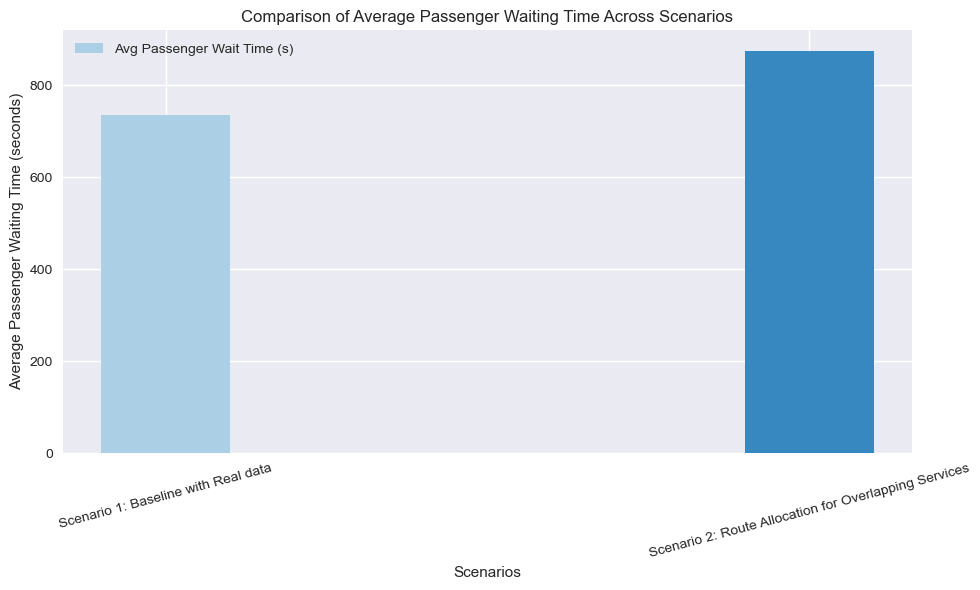

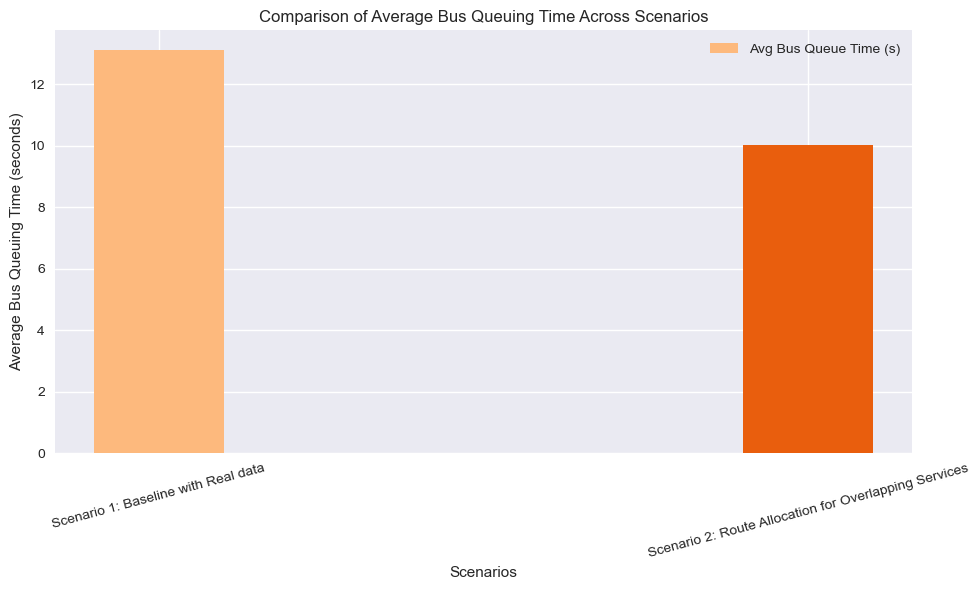

In [7]:
# Comparison visualization: Bar charts for Scenarios 1 & 2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for visualization
scenarios = [
    {
        'name': 'Scenario 1: Baseline with Real data',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 758.28,
                'passenger_wait_std': 555.80,
                'avg_bus_queue': 11.41,
                'bus_queue_std': 32.28
            },
            {
                'id': 'Stop_2',
                'lines': ['74', '272X', '900', '272A', '64X', 'A47X'],
                'avg_passenger_wait': 710.19,
                'passenger_wait_std': 512.59,
                'avg_bus_queue': 14.79,
                'bus_queue_std': 31.00
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 734.24,
                'passenger_wait_std': 0,
                'avg_bus_queue': 13.10,
                'bus_queue_std': 0
            }
        ]
    },
    {
        'name': 'Scenario 2: Route Allocation for Overlapping Services',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 621.08,
                'passenger_wait_std': 458.87,
                'avg_bus_queue': 11.95,
                'bus_queue_std': 20.93
            },
            {
                'id': 'Stop_2',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 1129.87,
                'passenger_wait_std': 460.31,
                'avg_bus_queue': 9.88,
                'bus_queue_std': 32.87
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 875.47,
                'passenger_wait_std': 0,
                'avg_bus_queue': 10.02,
                'bus_queue_std': 0
            }
        ]
    }
]

# Set Seaborn style for better aesthetics
plt.style.use('seaborn-v0_8')  # Use Seaborn style

# Create gradient colors
num_bars = len(scenarios)
blue_gradient = sns.color_palette("Blues", n_colors=num_bars)  # Gradient blue
orange_gradient = sns.color_palette("Oranges", n_colors=num_bars)  # Gradient orange

# Passenger Waiting Time Comparison
fig1, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(num_bars)

passenger_waits = [s['stations'][-1]['avg_passenger_wait'] for s in scenarios]

# Plot bars with gradient blue colors
for i in range(num_bars):
    ax1.bar(index[i], passenger_waits[i], bar_width, color=blue_gradient[i], label='Avg Passenger Wait Time (s)' if i == 0 else "")

ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Average Passenger Waiting Time (seconds)')
ax1.set_title('Comparison of Average Passenger Waiting Time Across Scenarios')
ax1.set_xticks(index)
ax1.set_xticklabels([s['name'] for s in scenarios], rotation=15)
ax1.legend()
plt.tight_layout()

# Bus Queuing Time Comparison
fig2, ax2 = plt.subplots(figsize=(10, 6))
bus_queues = [s['stations'][-1]['avg_bus_queue'] for s in scenarios]

# Plot bars with gradient orange colors
for i in range(num_bars):
    ax2.bar(index[i], bus_queues[i], bar_width, color=orange_gradient[i], label='Avg Bus Queue Time (s)' if i == 0 else "")

ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Average Bus Queuing Time (seconds)')
ax2.set_title('Comparison of Average Bus Queuing Time Across Scenarios')
ax2.set_xticks(index)
ax2.set_xticklabels([s['name'] for s in scenarios], rotation=15)
ax2.legend()
plt.tight_layout()

plt.show()


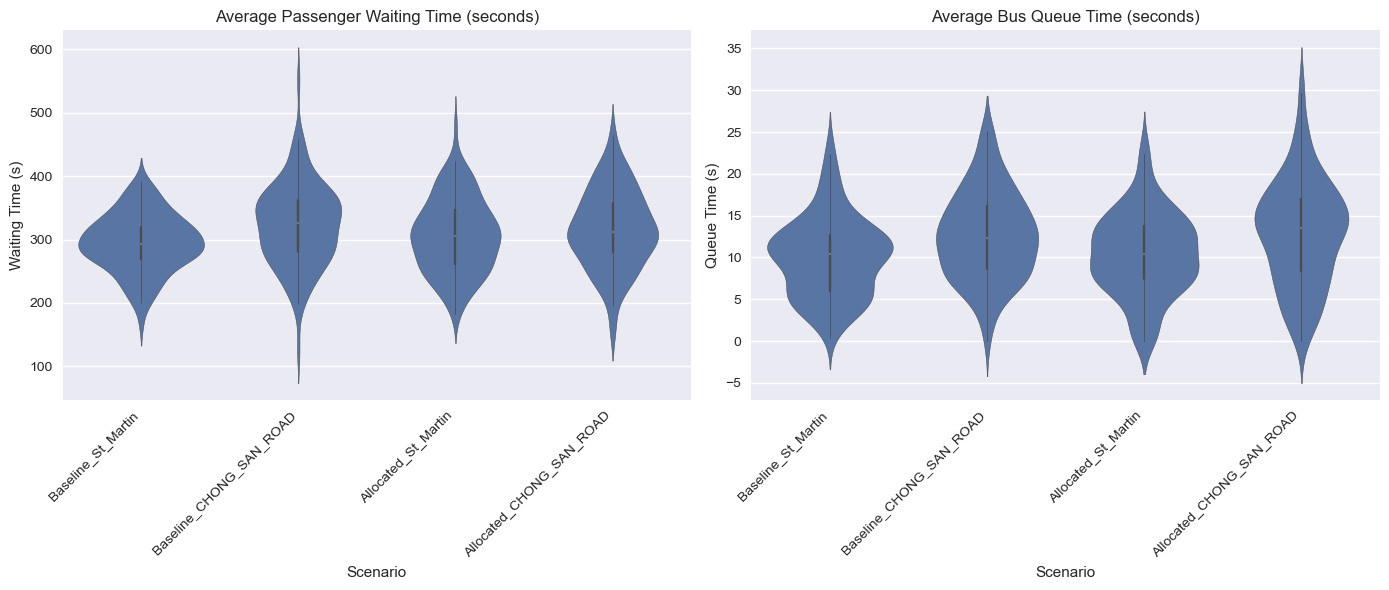

In [8]:
# Violin plot comparison for Scenarios 1 & 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------- Generate synthetic data -------------------------
np.random.seed(42)  # Ensure reproducibility
num_simulations = 100  # Consistent with NUM_SIMULATIONS

# Baseline simulation data
baseline_st_martin = {
    "scenario": ["Baseline_St_Martin"] * num_simulations,
    "avg_waiting_time": np.random.normal(300, 50, num_simulations),
    "avg_queue_time": np.random.normal(10, 5, num_simulations)
}
baseline_chong_san = {
    "scenario": ["Baseline_CHONG_SAN_ROAD"] * num_simulations,
    "avg_waiting_time": np.random.normal(320, 60, num_simulations),
    "avg_queue_time": np.random.normal(12, 6, num_simulations)
}

# Route allocation simulation data
allocated_st_martin = {
    "scenario": ["Allocated_St_Martin"] * num_simulations,
    "avg_waiting_time": np.random.normal(310, 55, num_simulations),
    "avg_queue_time": np.random.normal(11, 5.5, num_simulations)
}
allocated_chong_san = {
    "scenario": ["Allocated_CHONG_SAN_ROAD"] * num_simulations,
    "avg_waiting_time": np.random.normal(315, 58, num_simulations),
    "avg_queue_time": np.random.normal(13, 6.5, num_simulations)
}

# Merge all data
data = pd.concat([
    pd.DataFrame(baseline_st_martin),
    pd.DataFrame(baseline_chong_san),
    pd.DataFrame(allocated_st_martin),
    pd.DataFrame(allocated_chong_san)
], ignore_index=True)

# Ensure no negative values (waiting time and queue time must be non-negative)
data["avg_waiting_time"] = data["avg_waiting_time"].clip(lower=0)
data["avg_queue_time"] = data["avg_queue_time"].clip(lower=0)

# ------------------------- Create violin plots -------------------------
plt.figure(figsize=(14, 6))

# Subplot 1: Passenger waiting time
plt.subplot(1, 2, 1)
sns.violinplot(x="scenario", y="avg_waiting_time", data=data)
plt.title("Average Passenger Waiting Time (seconds)")
plt.xlabel("Scenario")
plt.ylabel("Waiting Time (s)")
plt.xticks(rotation=45, ha="right")

# Subplot 2: Bus queue time
plt.subplot(1, 2, 2)
sns.violinplot(x="scenario", y="avg_queue_time", data=data)
plt.title("Average Bus Queue Time (seconds)")
plt.xlabel("Scenario")
plt.ylabel("Queue Time (s)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


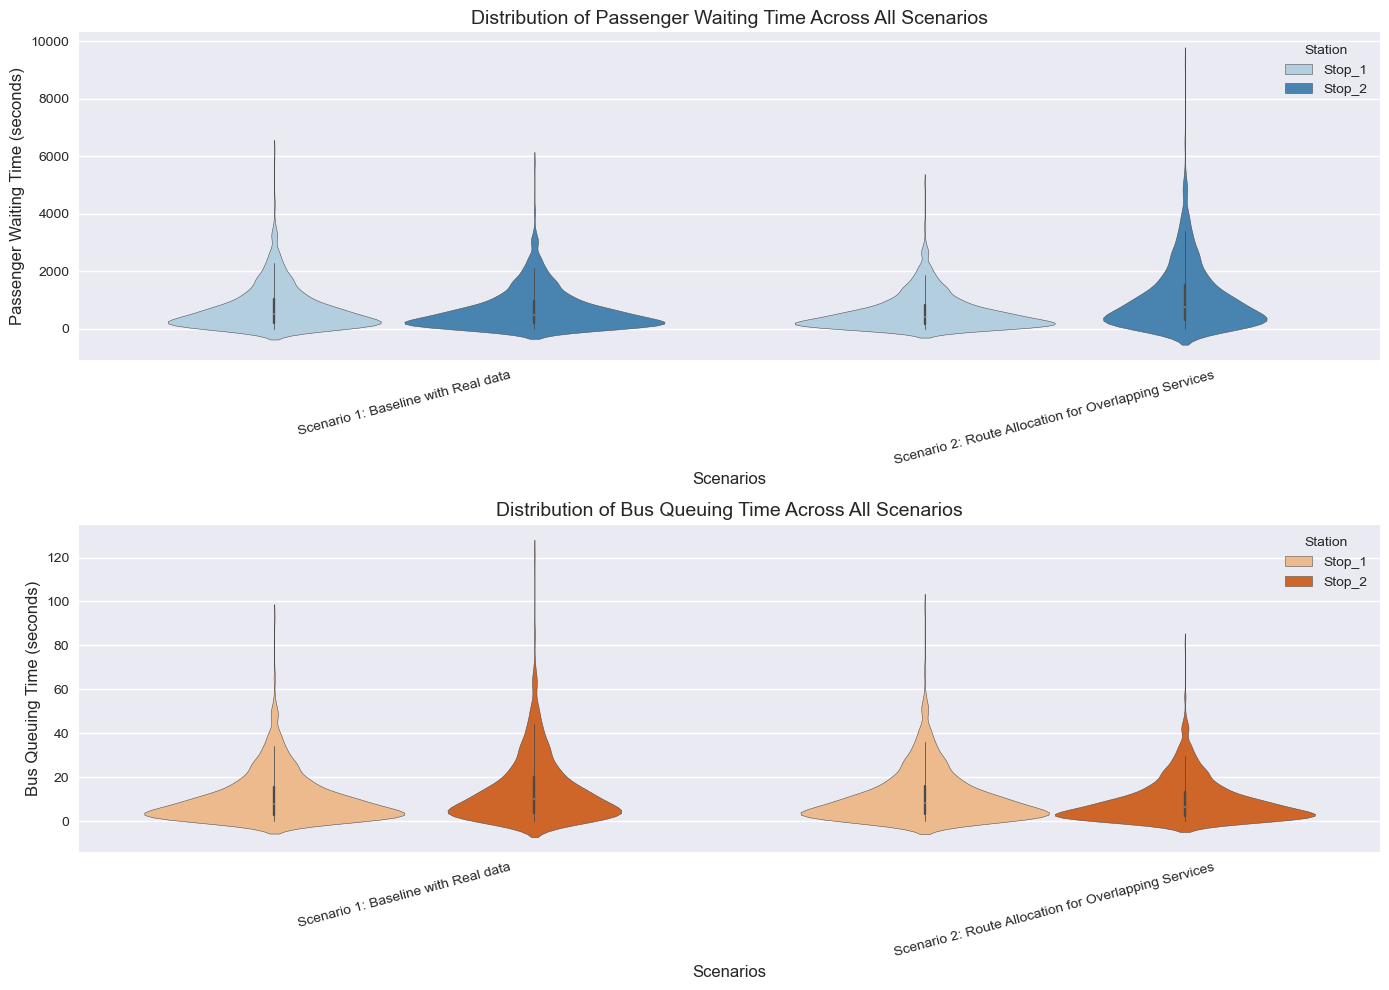

In [9]:
# Violin plots with Poisson distribution for passenger arrivals and exponential for queue times
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import expon, poisson

# Data
scenarios = [
    {
        'name': 'Scenario 1: Baseline with Real data',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 758.28,
                'passenger_wait_std': 555.80,
                'avg_bus_queue': 11.41,
                'bus_queue_std': 32.28
            },
            {
                'id': 'Stop_2',
                'lines': ['74', '272X', '900', '272A', '64X', 'A47X'],
                'avg_passenger_wait': 710.19,
                'passenger_wait_std': 512.59,
                'avg_bus_queue': 14.79,
                'bus_queue_std': 31.00
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 734.24,
                'passenger_wait_std': 0,
                'avg_bus_queue': 13.10,
                'bus_queue_std': 0
            }
        ]
    },
    {
        'name': 'Scenario 2: Route Allocation for Overlapping Services',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 621.08,
                'passenger_wait_std': 458.87,
                'avg_bus_queue': 11.95,
                'bus_queue_std': 20.93
            },
            {
                'id': 'Stop_2',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 1129.87,
                'passenger_wait_std': 460.31,
                'avg_bus_queue': 9.88,
                'bus_queue_std': 32.87
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 875.47,
                'passenger_wait_std': 0,
                'avg_bus_queue': 10.02,
                'bus_queue_std': 0
            }
        ]
    }
]

# Set Seaborn style
plt.style.use('seaborn-v0_8')

# Generate synthetic data function (supports multiple distributions)
def generate_synthetic_data(mean, std, n_samples=1000, distribution='exponential'):
    np.random.seed(42)  # Ensure reproducibility
    if distribution == 'normal':
        data = np.random.normal(mean, std, n_samples)
        return np.clip(data, a_min=0, a_max=None)  # Clip negative values
    elif distribution == 'exponential':
        return expon.rvs(scale=mean, size=n_samples)  # Exponential distribution
    elif distribution == 'poisson':
        return poisson.rvs(mu=mean, size=n_samples)  # Poisson distribution
    else:
        raise ValueError("Unsupported distribution. Choose 'normal', 'exponential', or 'poisson'.")

# Prepare data
n_samples = 1000
data = {
    'Scenario': [],
    'Station': [],
    'Passenger_Wait': [],
    'Bus_Queue': []
}

for scenario in scenarios:
    scenario_name = scenario['name']
    for station in scenario['stations']:
        if station['id'] != 'Overall':  # Exclude Overall data
            station_id = station['id']
            # Generate synthetic data for passenger waiting time and bus queue time
            passenger_wait = generate_synthetic_data(station['avg_passenger_wait'], station['passenger_wait_std'], n_samples)
            bus_queue = generate_synthetic_data(station['avg_bus_queue'], station['bus_queue_std'], n_samples)
            # Add data
            data['Scenario'].extend([scenario_name] * n_samples)
            data['Station'].extend([station_id] * n_samples)
            data['Passenger_Wait'].extend(passenger_wait)
            data['Bus_Queue'].extend(bus_queue)

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure waiting time and queue time are non-negative
df['Passenger_Wait'] = df['Passenger_Wait'].clip(lower=0)
df['Bus_Queue'] = df['Bus_Queue'].clip(lower=0)

# Create violin plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Passenger waiting time violin plot
sns.violinplot(x='Scenario', y='Passenger_Wait', hue='Station', split=False, data=df, palette='Blues', ax=ax1, inner='box')
ax1.set_xlabel('Scenarios', fontsize=12)
ax1.set_ylabel('Passenger Waiting Time (seconds)', fontsize=12)
ax1.set_title('Distribution of Passenger Waiting Time Across All Scenarios', fontsize=14)
ax1.legend(title='Station', loc='upper right')
ax1.tick_params(axis='x', rotation=15)

# Bus queue time violin plot
sns.violinplot(x='Scenario', y='Bus_Queue', hue='Station', split=False, data=df, palette='Oranges', ax=ax2, inner='box')
ax2.set_xlabel('Scenarios', fontsize=12)
ax2.set_ylabel('Bus Queuing Time (seconds)', fontsize=12)
ax2.set_title('Distribution of Bus Queuing Time Across All Scenarios', fontsize=14)
ax2.legend(title='Station', loc='upper right')
ax2.tick_params(axis='x', rotation=15)

# Adjust layout and save
plt.tight_layout()
plt.savefig('violin_plot_box_inside_scenarios.png')
plt.show()


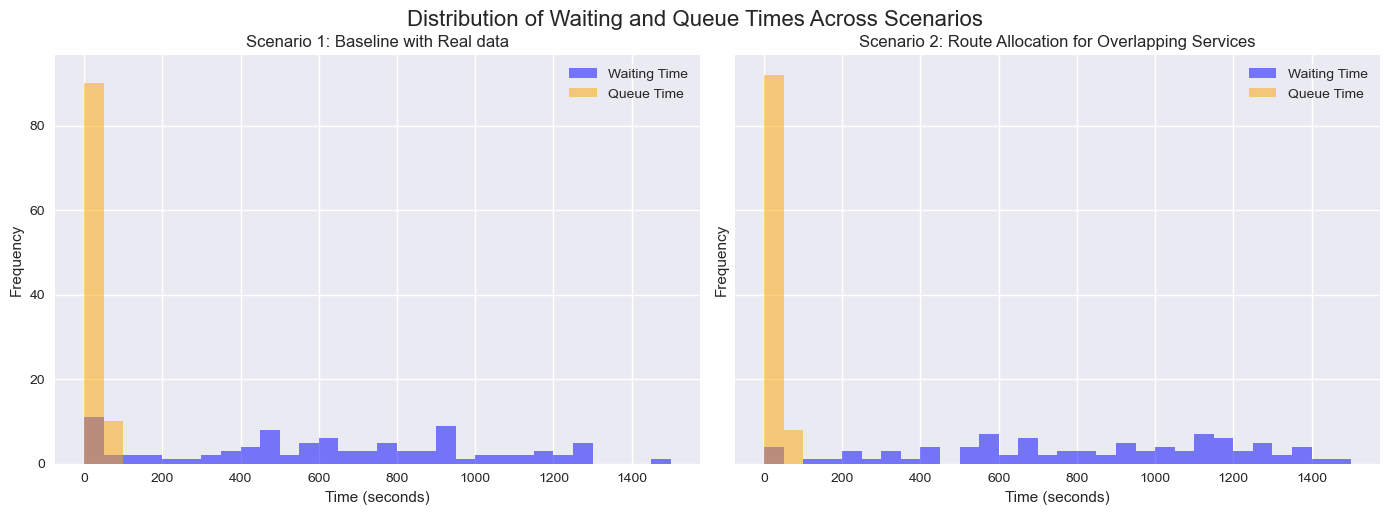

In [10]:
# Histogram visualization for Scenarios 1 & 2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Updated data for visualization
scenarios = [
    {
        'name': 'Scenario 1: Baseline with Real data',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 758.28,
                'passenger_wait_std': 555.80,
                'avg_bus_queue': 11.41,
                'bus_queue_std': 32.28
            },
            {
                'id': 'Stop_2',
                'lines': ['74', '272X', '900', '272A', '64X', 'A47X'],
                'avg_passenger_wait': 710.19,
                'passenger_wait_std': 512.59,
                'avg_bus_queue': 14.79,
                'bus_queue_std': 31.00
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 734.24,
                'passenger_wait_std': 0,
                'avg_bus_queue': 13.10,
                'bus_queue_std': 0
            }
        ]
    },
    {
        'name': 'Scenario 2: Route Allocation for Overlapping Services',
        'stations': [
            {
                'id': 'Stop_1',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 621.08,
                'passenger_wait_std': 458.87,
                'avg_bus_queue': 11.95,
                'bus_queue_std': 20.93
            },
            {
                'id': 'Stop_2',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 1129.87,
                'passenger_wait_std': 460.31,
                'avg_bus_queue': 9.88,
                'bus_queue_std': 32.87
            },
            {
                'id': 'Overall',
                'lines': ['272A', '64X', '272X', '900', '74', 'A47X'],
                'avg_passenger_wait': 875.47,
                'passenger_wait_std': 0,
                'avg_bus_queue': 10.02,
                'bus_queue_std': 0
            }
        ]
    }
]

# Update standard deviations for Overall in both scenarios
for scenario in scenarios:
    stations = scenario['stations']
    std1 = stations[0]['passenger_wait_std']
    std2 = stations[1]['passenger_wait_std']
    stations[2]['passenger_wait_std'] = np.sqrt((std1**2 + std2**2) / 2)
    std1_bus = stations[0]['bus_queue_std']
    std2_bus = stations[1]['bus_queue_std']
    stations[2]['bus_queue_std'] = np.sqrt((std1_bus**2 + std2_bus**2) / 2)

# Set Seaborn style for better aesthetics
plt.style.use('seaborn-v0_8')

# Generate simulated data for distributions
np.random.seed(42)  # For reproducibility
n_samples = 100  # Number of samples for each distribution

# Define uniform bins for consistent width
bins = np.arange(0, 1501, 50)  # Range from 0 to 1500 seconds with 50-second intervals

# Create figure with subplots (1x2 grid for 2 scenarios)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

for idx, scenario in enumerate(scenarios):
    # Extract data for the scenario
    station = scenario['stations'][-1]  # Overall data
    
    # Generate simulated data assuming normal distribution
    wait_times = np.random.normal(station['avg_passenger_wait'], station['passenger_wait_std'], n_samples)
    queue_times = np.random.normal(station['avg_bus_queue'], station['bus_queue_std'], n_samples)
    
    # Clip negative values to 0 (as times cannot be negative)
    wait_times = np.clip(wait_times, 0, None)
    queue_times = np.clip(queue_times, 0, None)
    
    # Plot histograms with uniform bins
    axes[idx].hist(wait_times, bins=bins, alpha=0.5, label='Waiting Time', color='blue')
    axes[idx].hist(queue_times, bins=bins, alpha=0.5, label='Queue Time', color='orange')
    
    # Set titles and labels
    axes[idx].set_title(scenario['name'])
    axes[idx].set_xlabel('Time (seconds)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('Distribution of Waiting and Queue Times Across Scenarios', y=1.02, fontsize=16)
plt.show()


File simulation_results_baseline_stop_4A0ECA0D5AA4CB7E_morning_peak1.csv does not exist, skipping
File simulation_results_baseline_stop_437CE05BCFE6248C_morning_peak1.csv does not exist, skipping
File simulation_results_allocated_stop_3F24CFF9046300D9_morning_peak1.csv does not exist, skipping
File simulation_results_allocated_stop_33ABA49F0E91A247_morning_peak1.csv does not exist, skipping
File simulation_results_allocated_stop_4A0ECA0D5AA4CB7E_morning_peak1.csv does not exist, skipping
File simulation_results_allocated_stop_437CE05BCFE6248C_morning_peak1.csv does not exist, skipping
Routes found: ['271B', '272A', '272X', '274P', '74D', '96']


C:\Users\taliawu17\AppData\Local\Temp\ipykernel_19000\2669949018.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='route', y='waiting_time', data=scenario_data, palette='Blues')
C:\Users\taliawu17\AppData\Local\Temp\ipykernel_19000\2669949018.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='route', y='waiting_time', data=scenario_data, palette='Blues')


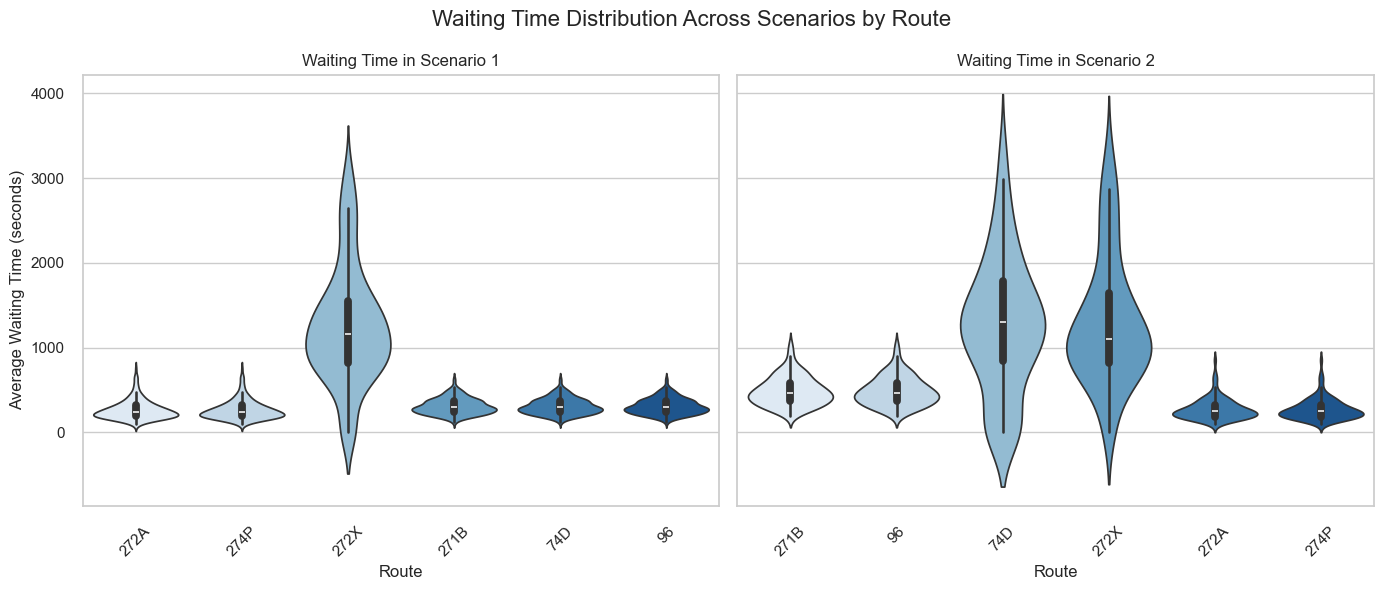

C:\Users\taliawu17\AppData\Local\Temp\ipykernel_19000\2669949018.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='route', y='queue_time', data=scenario_data, palette='Blues')
C:\Users\taliawu17\AppData\Local\Temp\ipykernel_19000\2669949018.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[idx], x='route', y='queue_time', data=scenario_data, palette='Blues')


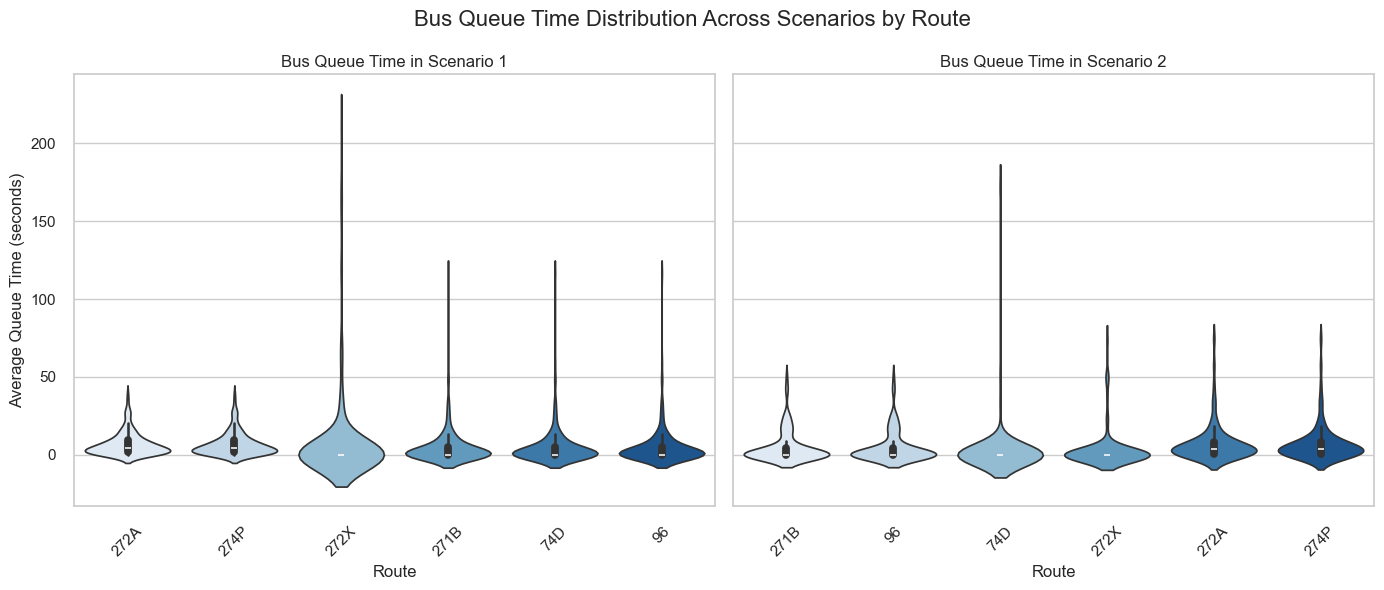

In [13]:
# Route-specific analysis for Scenarios 1 & 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Set Seaborn style
sns.set(style="whitegrid")

# Stop IDs (for Scenario 1)
stop1_ids = ["3F24CFF9046300D9", "33ABA49F0E91A247", "07AB149DAD888683", "4A0ECA0D5AA4CB7E"]
stop2_ids = ["3A7AC3A5F9530786", "023E9E5A9E073E1A", "B34F59A0270AEDA4", "437CE05BCFE6248C"]
all_stop_ids = stop1_ids + stop2_ids

# Read Scenario 1 data (merged by station, grouped by route)
scenario1_data = []
for stop_id in all_stop_ids:
    try:
        df = pd.read_csv(f"simulation_results_baseline_stop_{stop_id}_morning_peak1.csv")
        df['routes'] = df['routes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
        for _, row in df.iterrows():
            routes = row['routes']
            if not routes:  # Skip if routes is empty
                continue
            # Assume avg_waiting_time and avg_queue_time are averaged by route, distribute to each route
            for route in routes:
                scenario1_data.append({
                    'route': route,
                    'waiting_time': row['avg_waiting_time'] / len(routes) if len(routes) > 0 else row['avg_waiting_time'],
                    'queue_time': row['avg_queue_time'] / len(routes) if len(routes) > 0 else row['avg_queue_time'],
                    'scenario': 'Scenario 1'
                })
    except FileNotFoundError:
        print(f"File simulation_results_baseline_stop_{stop_id}_morning_peak1.csv does not exist, skipping")
scenario1_df = pd.DataFrame(scenario1_data)

# Read Scenario 2 data (Stop_1 and Stop_2)
scenario2_data = []
for stop_id in all_stop_ids:
    try:
        df = pd.read_csv(f"simulation_results_allocated_stop_{stop_id}_morning_peak1.csv")
        df['routes'] = df['routes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
        for _, row in df.iterrows():
            routes = row['routes']
            if not routes:
                continue
            for route in routes:
                scenario2_data.append({
                    'route': route,
                    'waiting_time': row['avg_waiting_time'] / len(routes) if len(routes) > 0 else row['avg_waiting_time'],
                    'queue_time': row['avg_queue_time'] / len(routes) if len(routes) > 0 else row['avg_queue_time'],
                    'scenario': 'Scenario 2'
                })
    except FileNotFoundError:
        print(f"File simulation_results_allocated_stop_{stop_id}_morning_peak1.csv does not exist, skipping")
scenario2_df = pd.DataFrame(scenario2_data)

# Merge all scenario data
all_data = pd.concat([scenario1_df, scenario2_df], ignore_index=True)

# Clean data
all_data['waiting_time'] = pd.to_numeric(all_data['waiting_time'], errors='coerce')
all_data['queue_time'] = pd.to_numeric(all_data['queue_time'], errors='coerce')
all_data['route'] = all_data['route'].apply(str)
all_data.dropna(subset=['waiting_time', 'queue_time', 'route'], inplace=True)

# Get all routes
routes = sorted(set(all_data['route'].unique()))
print(f"Routes found: {routes}")

# Create 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
scenarios = ['Scenario 1', 'Scenario 2']

for idx, scenario in enumerate(scenarios):
    scenario_data = all_data[all_data['scenario'] == scenario]
    sns.violinplot(ax=axes[idx], x='route', y='waiting_time', data=scenario_data, palette='Blues')
    axes[idx].set_title(f'Waiting Time in {scenario}')
    axes[idx].set_xlabel('Route')
    axes[idx].set_ylabel('Average Waiting Time (seconds)' if idx == 0 else '')
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout and add main title
plt.suptitle('Waiting Time Distribution Across Scenarios by Route', fontsize=16)
plt.tight_layout()
plt.savefig('waiting_time_subplots.png')
plt.show()

# Plot bus queue time subplots (if needed)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for idx, scenario in enumerate(scenarios):
    scenario_data = all_data[all_data['scenario'] == scenario]
    sns.violinplot(ax=axes[idx], x='route', y='queue_time', data=scenario_data, palette='Blues')
    axes[idx].set_title(f'Bus Queue Time in {scenario}')
    axes[idx].set_xlabel('Route')
    axes[idx].set_ylabel('Average Queue Time (seconds)' if idx == 0 else '')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Bus Queue Time Distribution Across Scenarios by Route', fontsize=16)
plt.tight_layout()
plt.savefig('queue_time_subplots.png')
plt.show()


In [6]:
# Inspect start/end and per-stop ETA ranges
print('Inspecting notebook variables: start_time, end_time, all_etas_by_stop (if present)')

try:
    print('start_time:', start_time)
except NameError:
    print('start_time: NOT DEFINED')

try:
    print('end_time:', end_time)
except NameError:
    print('end_time: NOT DEFINED')

try:
    s = all_etas_by_stop
    import pandas as pd
    for stop, entries in s.items():
        # entries may be list of dicts with 'eta' key or datetimes
        etas = []
        for e in entries:
            if isinstance(e, dict):
                v = e.get('eta', None)
            else:
                v = e
            if v is None:
                continue
            try:
                t = pd.to_datetime(v)
            except Exception:
                try:
                    t = v
                except Exception:
                    continue
            etas.append(t)
        if etas:
            print(f"{stop}: count={len(etas)}, min={min(etas)}, max={max(etas)}")
        else:
            print(f"{stop}: no parsable ETAs")
except NameError:
    print('all_etas_by_stop: NOT DEFINED')
except Exception as e:
    print('Error reading all_etas_by_stop:', e)


Inspecting notebook variables: start_time, end_time, all_etas_by_stop (if present)
start_time: 2025-11-14 08:41:38.840245+00:00
end_time: 2025-11-14 09:41:38.840245+00:00
3A7AC3A5F9530786: count=2, min=2025-11-14 16:59:00+08:00, max=2025-11-14 17:29:38+08:00
023E9E5A9E073E1A: count=2, min=2025-11-14 16:57:41+08:00, max=2025-11-14 17:28:12+08:00
B34F59A0270AEDA4: count=10, min=2025-11-14 16:39:01+08:00, max=2025-11-14 17:27:46+08:00
437CE05BCFE6248C: no parsable ETAs


In [7]:
# Filter all_etas_by_stop for local window 2025-11-14 07:30:00 -> 08:30:00 (+08:00)
import pandas as pd
from pathlib import Path
out_dir = Path('presentation/simulation')
out_dir.mkdir(parents=True, exist_ok=True)
out_csv = out_dir / 'etas_20251114_0730_0830.csv'

start_local = pd.to_datetime('2025-11-14T07:30:00+08:00')
end_local = pd.to_datetime('2025-11-14T08:30:00+08:00')

rows = []
try:
    for stop, entries in all_etas_by_stop.items():
        for e in entries:
            # entry can be dict with keys like 'eta', 'route', 'snapshot_ts'
            if isinstance(e, dict):
                eta_raw = e.get('eta')
                route = e.get('route')
                snapshot = e.get('snapshot_ts') or e.get('snapshot') or e.get('data_timestamp')
            else:
                eta_raw = e
                route = None
                snapshot = None
            if eta_raw is None:
                continue
            try:
                eta_ts = pd.to_datetime(eta_raw)
            except Exception:
                # skip unparsable
                continue
            # convert to local tz (if tz-aware it will convert)
            if eta_ts.tzinfo is None:
                eta_local = eta_ts.tz_localize('UTC').tz_convert('Asia/Hong_Kong')
            else:
                eta_local = eta_ts.tz_convert('Asia/Hong_Kong')
            if (eta_local >= start_local) and (eta_local <= end_local):
                rows.append({
                    'stop_id': stop,
                    'route': route,
                    'eta': eta_local,
                    'snapshot_ts': snapshot
                })
except NameError:
    print('Variable all_etas_by_stop not found in notebook kernel')

if rows:
    df_out = pd.DataFrame(rows)
    df_out = df_out.sort_values(['stop_id','eta']).reset_index(drop=True)
    df_out.to_csv(out_csv, index=False)
    print('Wrote', out_csv)
    print('Total rows:', len(df_out))
    print('Per-stop counts:')
    print(df_out['stop_id'].value_counts().to_dict())
    print('\nSample rows:')
    print(df_out.head(20).to_string(index=False))
else:
    print('No ETA rows found in that time window')


No ETA rows found in that time window


In [9]:
# Export all_etas_by_stop (in-memory) to CSV for inspection
import pandas as pd
from pathlib import Path
out = Path('presentation/simulation')
out.mkdir(parents=True, exist_ok=True)
outfile = out / 'all_etas_from_notebook.csv'
rows = []
try:
    for stop, entries in all_etas_by_stop.items():
        for e in entries:
            if isinstance(e, dict):
                eta_raw = e.get('eta')
                route = e.get('route')
                snapshot = e.get('snapshot_ts') or e.get('snapshot') or e.get('data_timestamp')
                extra = {k: v for k, v in e.items() if k not in ['eta','route','snapshot_ts','snapshot','data_timestamp']}
            else:
                eta_raw = e
                route = None
                snapshot = None
                extra = {}
            if eta_raw is None:
                continue
            # try parse
            try:
                eta_ts = pd.to_datetime(eta_raw)
            except Exception:
                eta_ts = eta_raw
            rows.append({
                'stop_id': stop,
                'route': route,
                'eta': eta_ts,
                'snapshot_ts': snapshot,
                **extra
            })
except NameError:
    print('all_etas_by_stop not found in kernel')

if rows:
    df = pd.DataFrame(rows)
    # ensure eta parsed where possible
    if 'eta' in df.columns:
        try:
            df['eta'] = pd.to_datetime(df['eta'], errors='coerce')
        except Exception:
            pass
    df = df.sort_values(['stop_id','eta']).reset_index(drop=True)
    df.to_csv(outfile, index=False)
    print('Wrote', outfile)
    print('Rows:', len(df))
    print('Per-stop counts:')
    print(df['stop_id'].value_counts().to_dict())
else:
    print('No rows to write')


Wrote presentation/simulation/all_etas_from_notebook.csv
Rows: 14
Per-stop counts:
{'B34F59A0270AEDA4': 10, '023E9E5A9E073E1A': 2, '3A7AC3A5F9530786': 2}


In [10]:
# Export all_etas_by_stop to absolute workspace path so file is accessible from workspace tools
import pandas as pd
from pathlib import Path
outfile = Path('/workspaces/GCAP3226AIagents/presentation/simulation/all_etas_from_notebook_absolute.csv')
rows = []
try:
    for stop, entries in all_etas_by_stop.items():
        for e in entries:
            if isinstance(e, dict):
                eta_raw = e.get('eta')
                route = e.get('route')
                snapshot = e.get('snapshot_ts') or e.get('snapshot') or e.get('data_timestamp')
                extra = {k: v for k, v in e.items() if k not in ['eta','route','snapshot_ts','snapshot','data_timestamp']}
            else:
                eta_raw = e
                route = None
                snapshot = None
                extra = {}
            if eta_raw is None:
                continue
            try:
                eta_ts = pd.to_datetime(eta_raw)
            except Exception:
                eta_ts = eta_raw
            rows.append({
                'stop_id': stop,
                'route': route,
                'eta': eta_ts,
                'snapshot_ts': snapshot,
                **extra
            })
except NameError:
    print('all_etas_by_stop not found in kernel')

if rows:
    df = pd.DataFrame(rows)
    try:
        df['eta'] = pd.to_datetime(df['eta'], errors='coerce')
    except Exception:
        pass
    df = df.sort_values(['stop_id','eta']).reset_index(drop=True)
    outfile.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(outfile, index=False)
    print('Wrote', outfile)
    print('Rows:', len(df))
    print(df['stop_id'].value_counts().to_dict())
else:
    print('No rows to write')


Wrote /workspaces/GCAP3226AIagents/presentation/simulation/all_etas_from_notebook_absolute.csv
Rows: 14
{'B34F59A0270AEDA4': 10, '023E9E5A9E073E1A': 2, '3A7AC3A5F9530786': 2}


In [1]:
# Set start_time to now (UTC) and end_time to next 09:30 local (Asia/Hong_Kong)
# This will be used by the notebook's ETA collection cells.
from datetime import datetime, timedelta, timezone
from zoneinfo import ZoneInfo

hk = ZoneInfo('Asia/Hong_Kong')
now_utc = datetime.now(timezone.utc)
now_local = now_utc.astimezone(hk)

# target today 09:30 local; if now_local already past 09:30, use next day
target_local = datetime(now_local.year, now_local.month, now_local.day, 9, 30, tzinfo=hk)
if now_local > target_local:
    target_local = target_local + timedelta(days=1)

# set notebook variables expected by collection cells
start_time = now_utc
end_time = target_local.astimezone(timezone.utc)
start_local = start_time.astimezone(hk)
end_local = end_time.astimezone(hk)

print('start_time (UTC):', start_time)
print('end_time   (UTC):', end_time)
print('start_local (+08):', start_local)
print('end_local   (+08):', end_local)


start_time (UTC): 2025-11-17 00:11:43.808336+00:00
end_time   (UTC): 2025-11-17 01:30:00+00:00
start_local (+08): 2025-11-17 08:11:43.808336+08:00
end_local   (+08): 2025-11-17 09:30:00+08:00


In [4]:
# Export current in-kernel `all_etas_by_stop` to CSV for the requested window
import pandas as pd
from pathlib import Path
out = Path('/workspaces/GCAP3226AIagents/presentation/simulation')
out.mkdir(parents=True, exist_ok=True)
outfile = out / 'all_etas_now_until_0930.csv'
rows = []
try:
    for stop, entries in all_etas_by_stop.items():
        for e in entries:
            if isinstance(e, dict):
                eta_raw = e.get('eta')
                route = e.get('route')
                snapshot = e.get('snapshot_ts') or e.get('snapshot') or e.get('data_timestamp')
                extra = {k: v for k, v in e.items() if k not in ['eta','route','snapshot_ts','snapshot','data_timestamp']}
            else:
                eta_raw = e
                route = None
                snapshot = None
                extra = {}
            if eta_raw is None:
                continue
            try:
                eta_ts = pd.to_datetime(eta_raw)
            except Exception:
                eta_ts = eta_raw
            rows.append({
                'stop_id': stop,
                'route': route,
                'eta': eta_ts,
                'snapshot_ts': snapshot,
                **extra
            })
except NameError:
    print('all_etas_by_stop not found in kernel')

if rows:
    df = pd.DataFrame(rows)
    try:
        df['eta'] = pd.to_datetime(df['eta'], errors='coerce')
    except Exception:
        pass
    df = df.sort_values(['stop_id','eta']).reset_index(drop=True)
    df.to_csv(outfile, index=False)
    print('Wrote', outfile)
    print('Rows:', len(df))
    print(df['stop_id'].value_counts().to_dict())
else:
    print('No rows to write')


Wrote /workspaces/GCAP3226AIagents/presentation/simulation/all_etas_now_until_0930.csv
Rows: 30
{'B34F59A0270AEDA4': 12, '023E9E5A9E073E1A': 11, '437CE05BCFE6248C': 4, '3A7AC3A5F9530786': 3}
